In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

### Notes from viz lectures

### Simplification
* Figure out consolidation schemes--ratios might be useful for rxtr params
* Exclude or dim unimportant data

### Headings for training set viz
* Goal for i.i.d. training set accomplished / not accomplished
* Certain locations in training set space difficult to predict OR error higher in certain locations in training set space
* Natural uranium not reliably predicted by any algorithm
* Complex models predict x parameters better than simple models (or vice versa)

# Scoring Visualizations

In [3]:
rxtr_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
burn_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
enri_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
cool_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

In [4]:
rxtr_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
burn_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
enri_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
cool_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

### Variance

In [11]:
var = 'test_explained_variance'
acc = 'test_accuracy'
alg = 'algorithm'
Alg = 'Algorithm'

In [12]:
burn2 = burn_scr2.filter(items = [alg, var])
cool2 = cool_scr2.filter(items = [alg, var])
enri2 = enri_scr2.filter(items = [alg, var])
rxtr2 = rxtr_scr2.filter(items = [alg, acc])

burn3 = burn_scr3.filter(items = [Alg, var])
cool3 = cool_scr3.filter(items = [Alg, var])
enri3 = enri_scr3.filter(items = [Alg, var])
rxtr3 = rxtr_scr3.filter(items = [Alg, acc])

burn2['Score'] = burn2[var]
cool2['Score'] = cool2[var]
enri2['Score'] = enri2[var]
rxtr2['Score'] = rxtr2[acc]

burn3['Score'] = burn3[var]
cool3['Score'] = cool3[var]
enri3['Score'] = enri3[var]
rxtr3['Score'] = rxtr3[acc]

In [16]:
rxtr3.head()

,Algorithm,test_accuracy,Score,Parameter
0,knn,0.973387,0.973387,Reactor Type
1,knn,0.973180,0.973180,Reactor Type
2,knn,0.974390,0.974390,Reactor Type
3,knn,0.973382,0.973382,Reactor Type
4,knn,0.973175,0.973175,Reactor Type


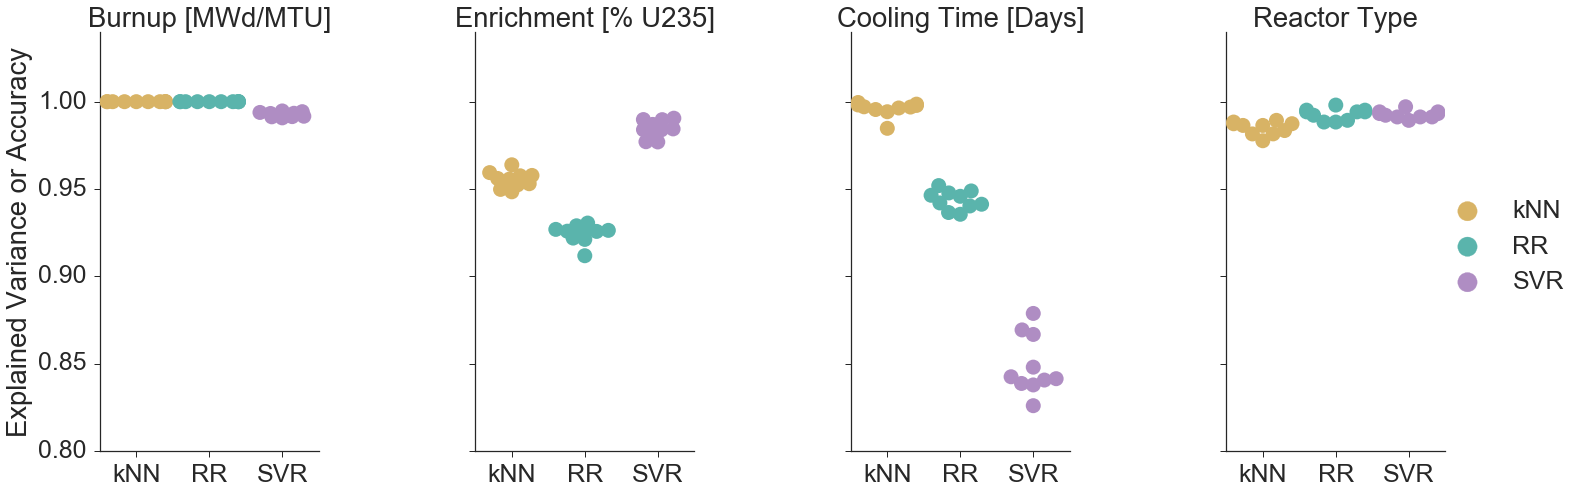

In [22]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn2['Parameter'] = 'Burnup [MWd/MTU]'
enri2['Parameter'] = 'Enrichment [% U235]'
cool2['Parameter'] = 'Cooling Time [Days]'
rxtr2['Parameter'] = 'Reactor Type'

scr = pd.DataFrame()
scr = pd.concat([burn2, enri2, cool2, rxtr2])

var = sns.factorplot(x=alg, y="Score",
                     hue=alg, col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance or Accuracy")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .set(ylim=(0.8, 1.04))
    .add_legend(markerscale=2.5))
new_labels = ['kNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('../results/22jul2018/graphs/2variance.png', bbox_inches='tight', transparent=True)

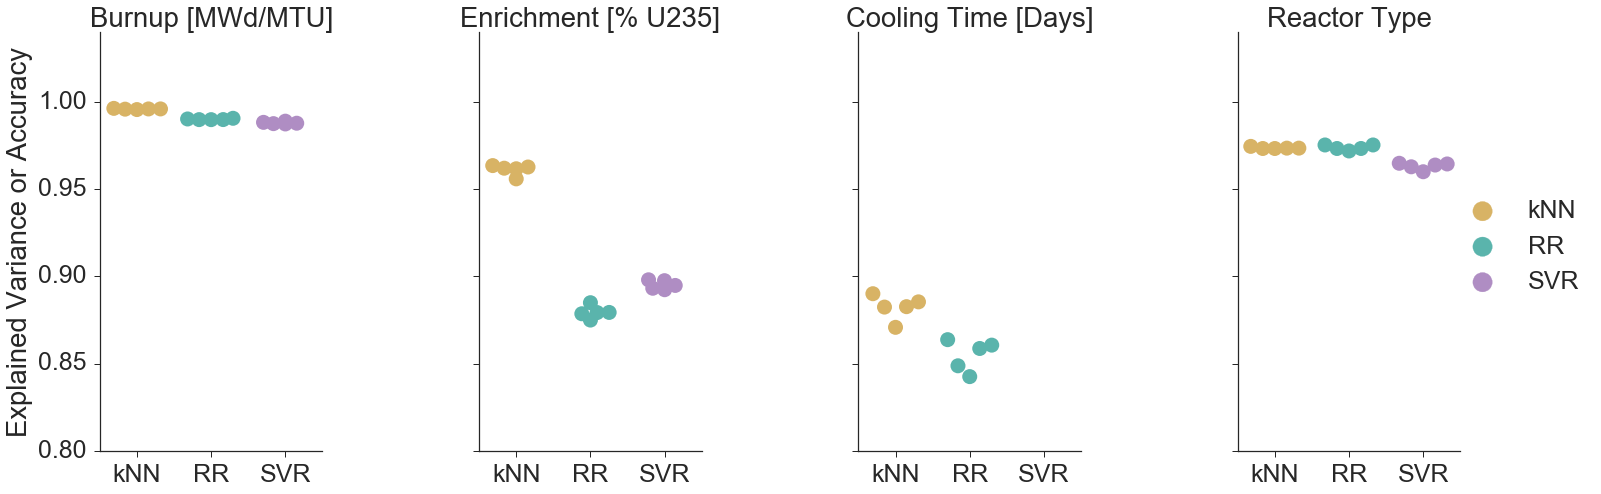

In [21]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn3['Parameter'] = 'Burnup [MWd/MTU]'
enri3['Parameter'] = 'Enrichment [% U235]'
cool3['Parameter'] = 'Cooling Time [Days]'
rxtr3['Parameter'] = 'Reactor Type'

scr = pd.DataFrame()
scr = pd.concat([burn3, enri3, cool3, rxtr3])

var = sns.factorplot(x=Alg, y="Score",
                     hue=Alg, col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance or Accuracy")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .set(ylim=(0.8, 1.04))
    .add_legend(markerscale=2.5))
new_labels = ['kNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('../results/22jul2018/graphs/3variance.png', bbox_inches='tight', transparent=True)

In [ ]:
mae = 'test_neg_mean_absolute_error'
alg = 'algorithm'

burn = burn_scr.loc[:, [alg, mae]]
cool = cool_scr.loc[:, [alg, mae]]
enri = enri_scr.loc[:, [alg, mae]]

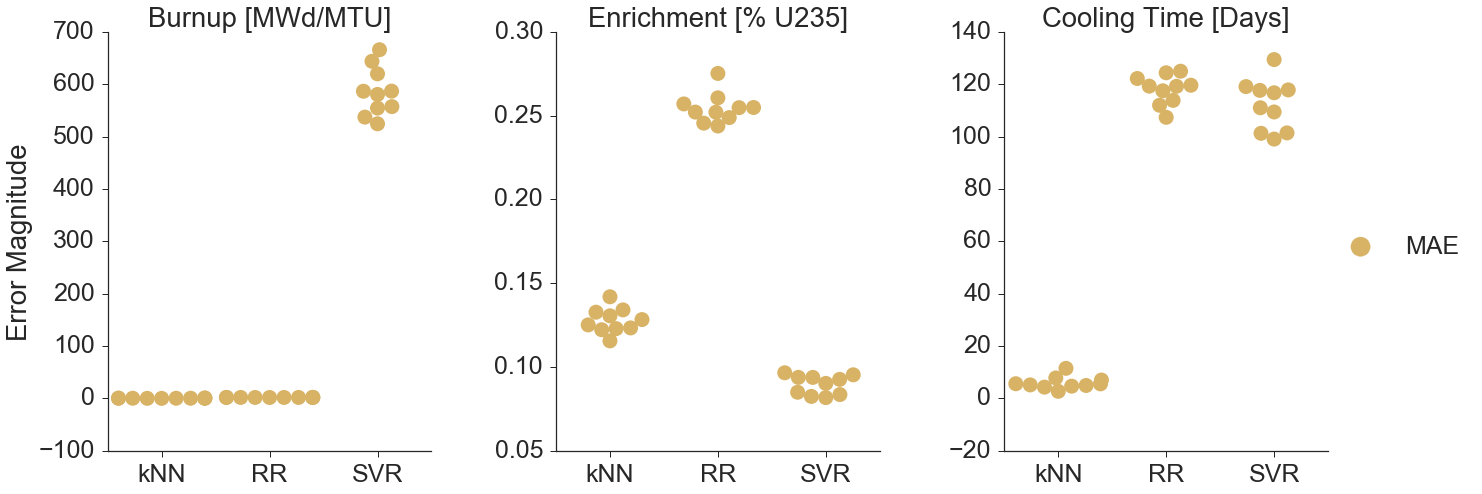

In [8]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn['Parameter'] = 'Burnup [MWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
cool['Parameter'] = 'Cooling Time [Days]'

err = pd.DataFrame()
err = pd.concat([burn, enri, cool])
err['MAE'] = -1 * err[mae]
#err['RMSE'] = -1 * err[rmse]

err = err.melt(id_vars = [alg, 'Parameter'], 
               value_vars = ['MAE',], 
               value_name='Error Magnitude', var_name='Error')

mer = sns.factorplot(x="algorithm", y='Error Magnitude',
                     hue='Error', col="Parameter", ci=95,
                     sharey=False, s=15, legend=False,
                     palette=sns.color_palette(med), 
                     data=err, kind="swarm", size=8, aspect=.8)

(mer.set_axis_labels("", "Error Magnitude")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .add_legend(markerscale=2.5))
#mer.axes[0,0].set_ylim(0, 5300)
#mer.axes[0,1].set_ylim(0, 0.75)
#mer.axes[0,2].set_ylim(0, 450)
#mer.savefig('../results/21jul2018/graphs/2error-compare.png', bbox_inches='tight', transparent=True)